In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [3]:
dataset = pd.read_csv('/content/sample_data/breast_cancer.csv')

In [4]:
dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
col_name = dataset.columns

In [6]:
col_name

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [8]:
y= dataset.diagnosis
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [12]:
drop_cols = ['id','diagnosis']
x= dataset.drop(drop_cols, axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Number of Benign Tumor :  357
Number of Malignant Tumor :  212


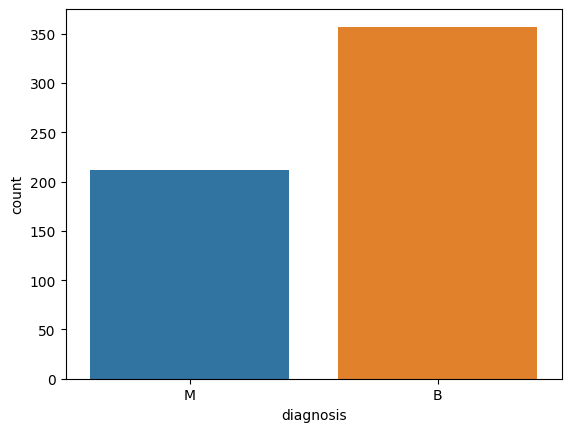

In [10]:
ax = sns.countplot(x = 'diagnosis', data = dataset)
B, M  = y.value_counts()
print('Number of Benign Tumor : ',B)
print('Number of Malignant Tumor : ', M)

In [ ]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 38.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.9% of the points cannot be placed; y

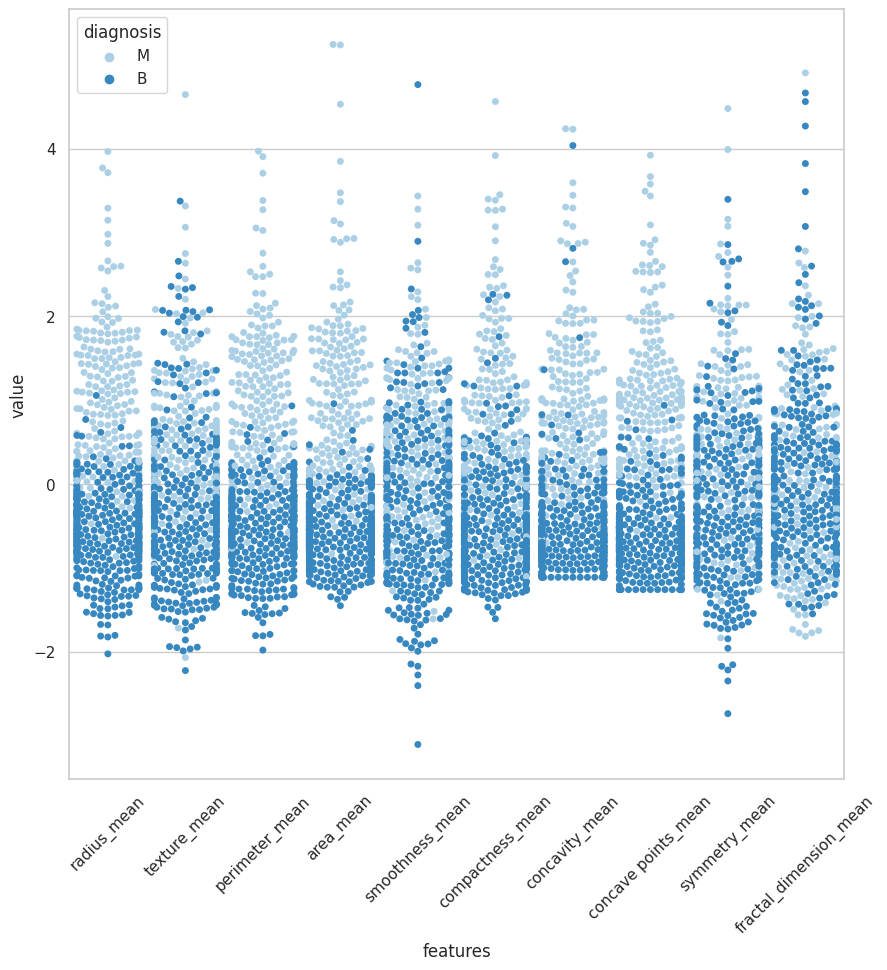

In [13]:
sns.set(style='whitegrid')
data=x
data_std=(data-data.mean())/data.std()
data=pd.concat([y,data_std.iloc[:,0:10]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data,palette='Blues')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 64.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 66.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 71.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 61.7% of the points cannot be placed; y

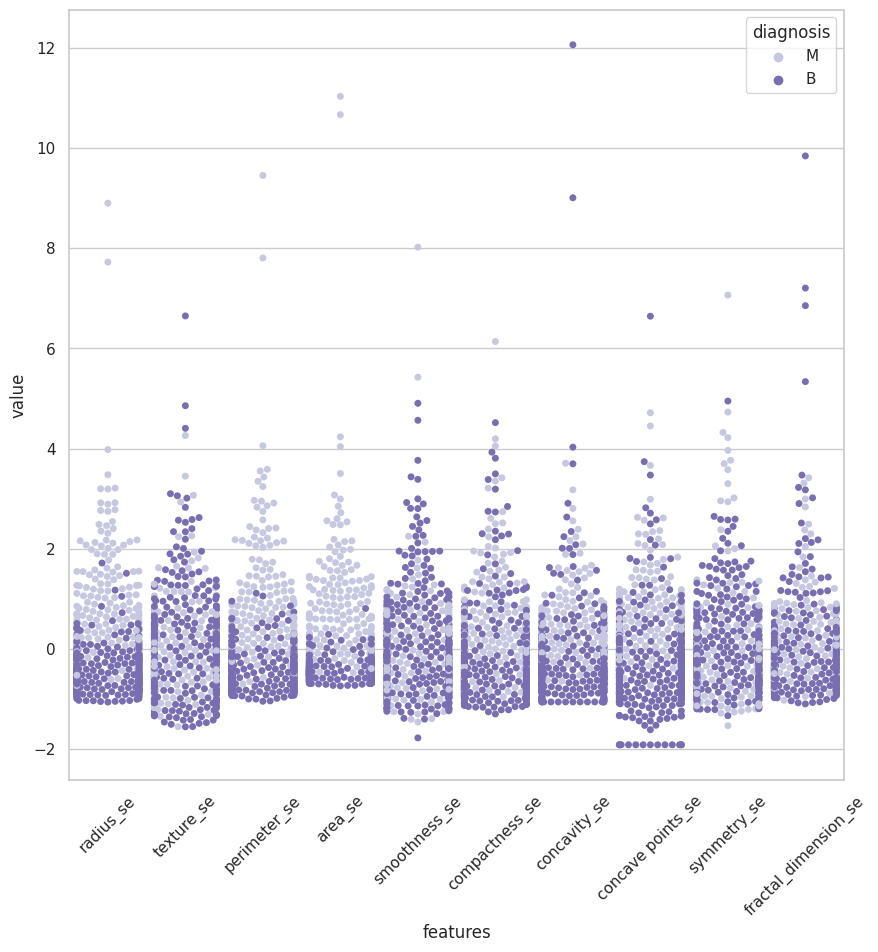

In [14]:
sns.set(style='whitegrid')
data=x
data_std=(data-data.mean())/data.std()
data=pd.concat([y,data_std.iloc[:,10:20]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data,palette='Purples')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 43.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 53.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:3544: UserWarning: 42.9% of the points cannot be placed; y

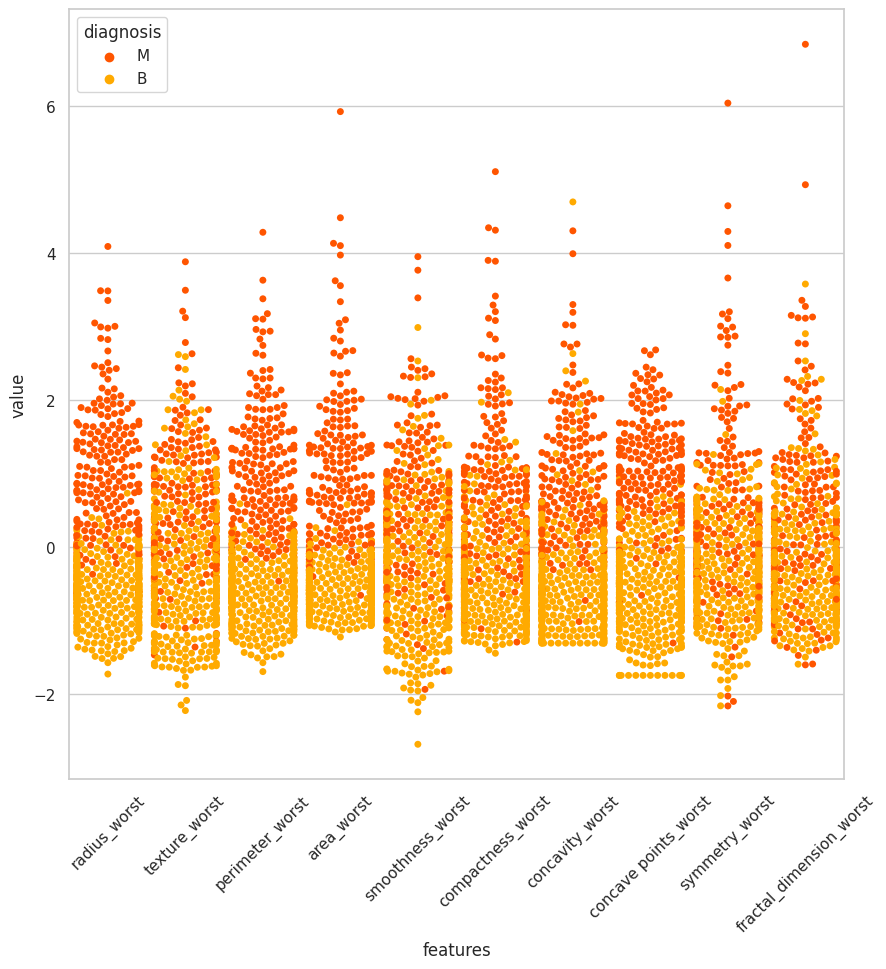

In [15]:
sns.set(style='whitegrid')
data=x
data_std=(data-data.mean())/data.std()
data=pd.concat([y,data_std.iloc[:,20:30]],axis=1)
data=pd.melt(data,id_vars='diagnosis',var_name='features',value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x='features',y='value',hue='diagnosis',data=data,palette='autumn')
plt.xticks(rotation=45)
plt.show()



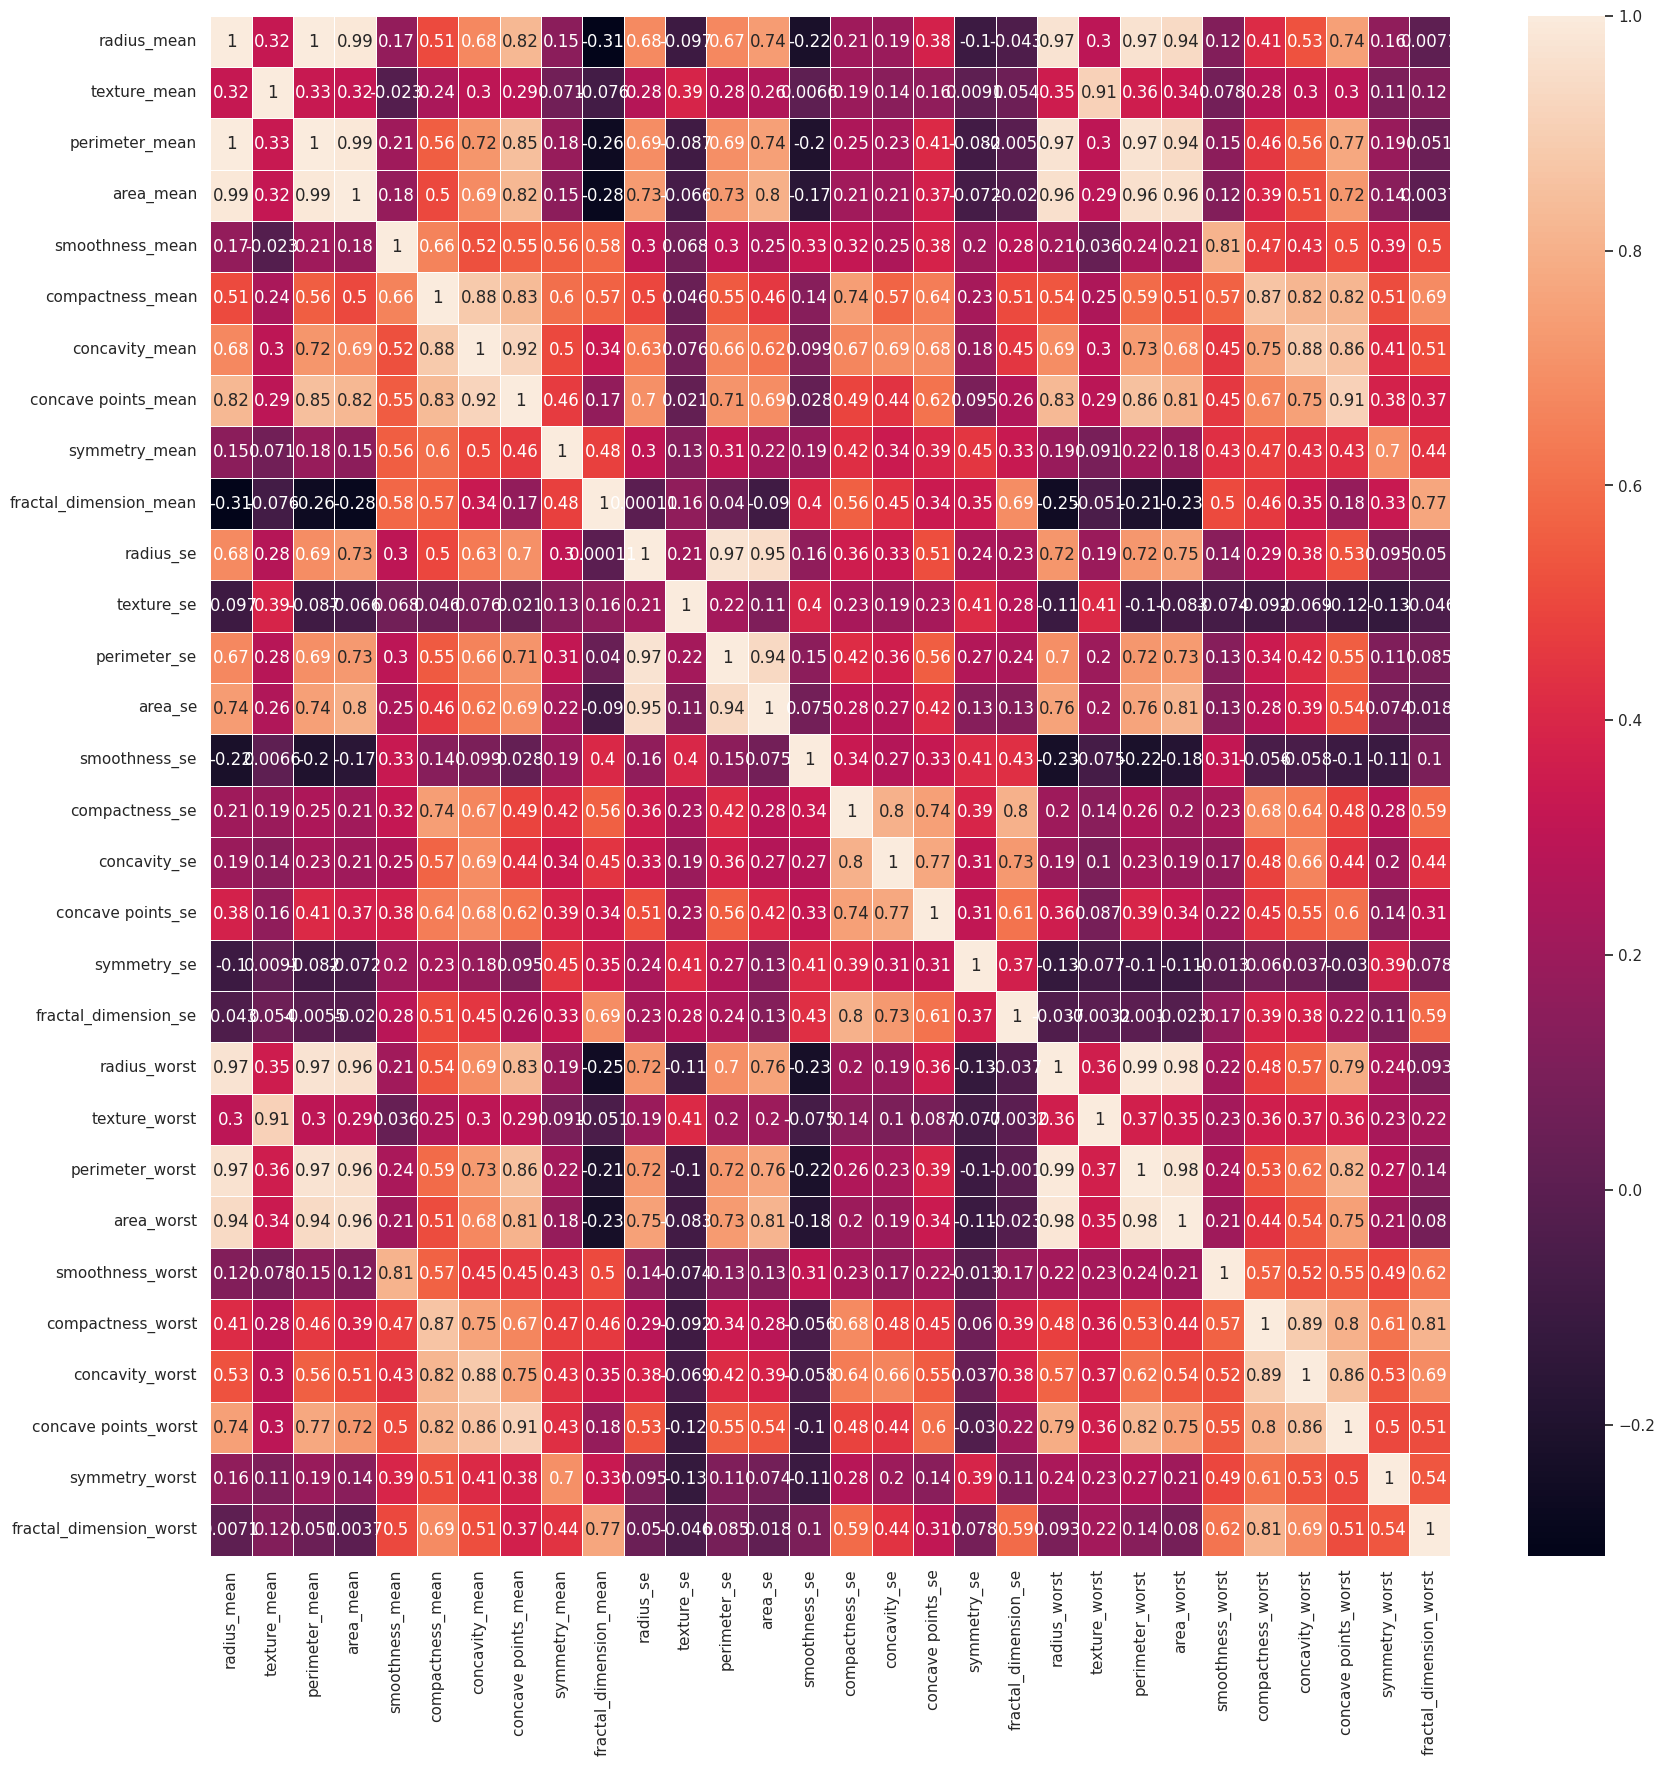

In [ ]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(x.corr(), annot = True, linewidth = 0.5, ax =ax)
plt.show()

In [19]:
drop_list = ['perimeter_mean', 'radius_mean', 'compactness_mean', 
             'radius_se', 'radius_worst', 'perimeter_worst', 'compactness_worst',
              'compactness_se', 'texture_worst', 'area_worst']
x1 = x.drop(drop_list, axis = 1)
x1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,area_se,smoothness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.14710,0.2419,0.07871,0.9053,8.589,153.40,0.006399,0.05373,0.01587,0.03003,0.006193,0.1622,0.7119,0.2654,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.07017,0.1812,0.05667,0.7339,3.398,74.08,0.005225,0.01860,0.01340,0.01389,0.003532,0.1238,0.2416,0.1860,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.12790,0.2069,0.05999,0.7869,4.585,94.03,0.006150,0.03832,0.02058,0.02250,0.004571,0.1444,0.4504,0.2430,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.10520,0.2597,0.09744,1.1560,3.445,27.23,0.009110,0.05661,0.01867,0.05963,0.009208,0.2098,0.6869,0.2575,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.10430,0.1809,0.05883,0.7813,5.438,94.44,0.011490,0.05688,0.01885,0.01756,0.005115,0.1374,0.4000,0.1625,0.2364,0.07678


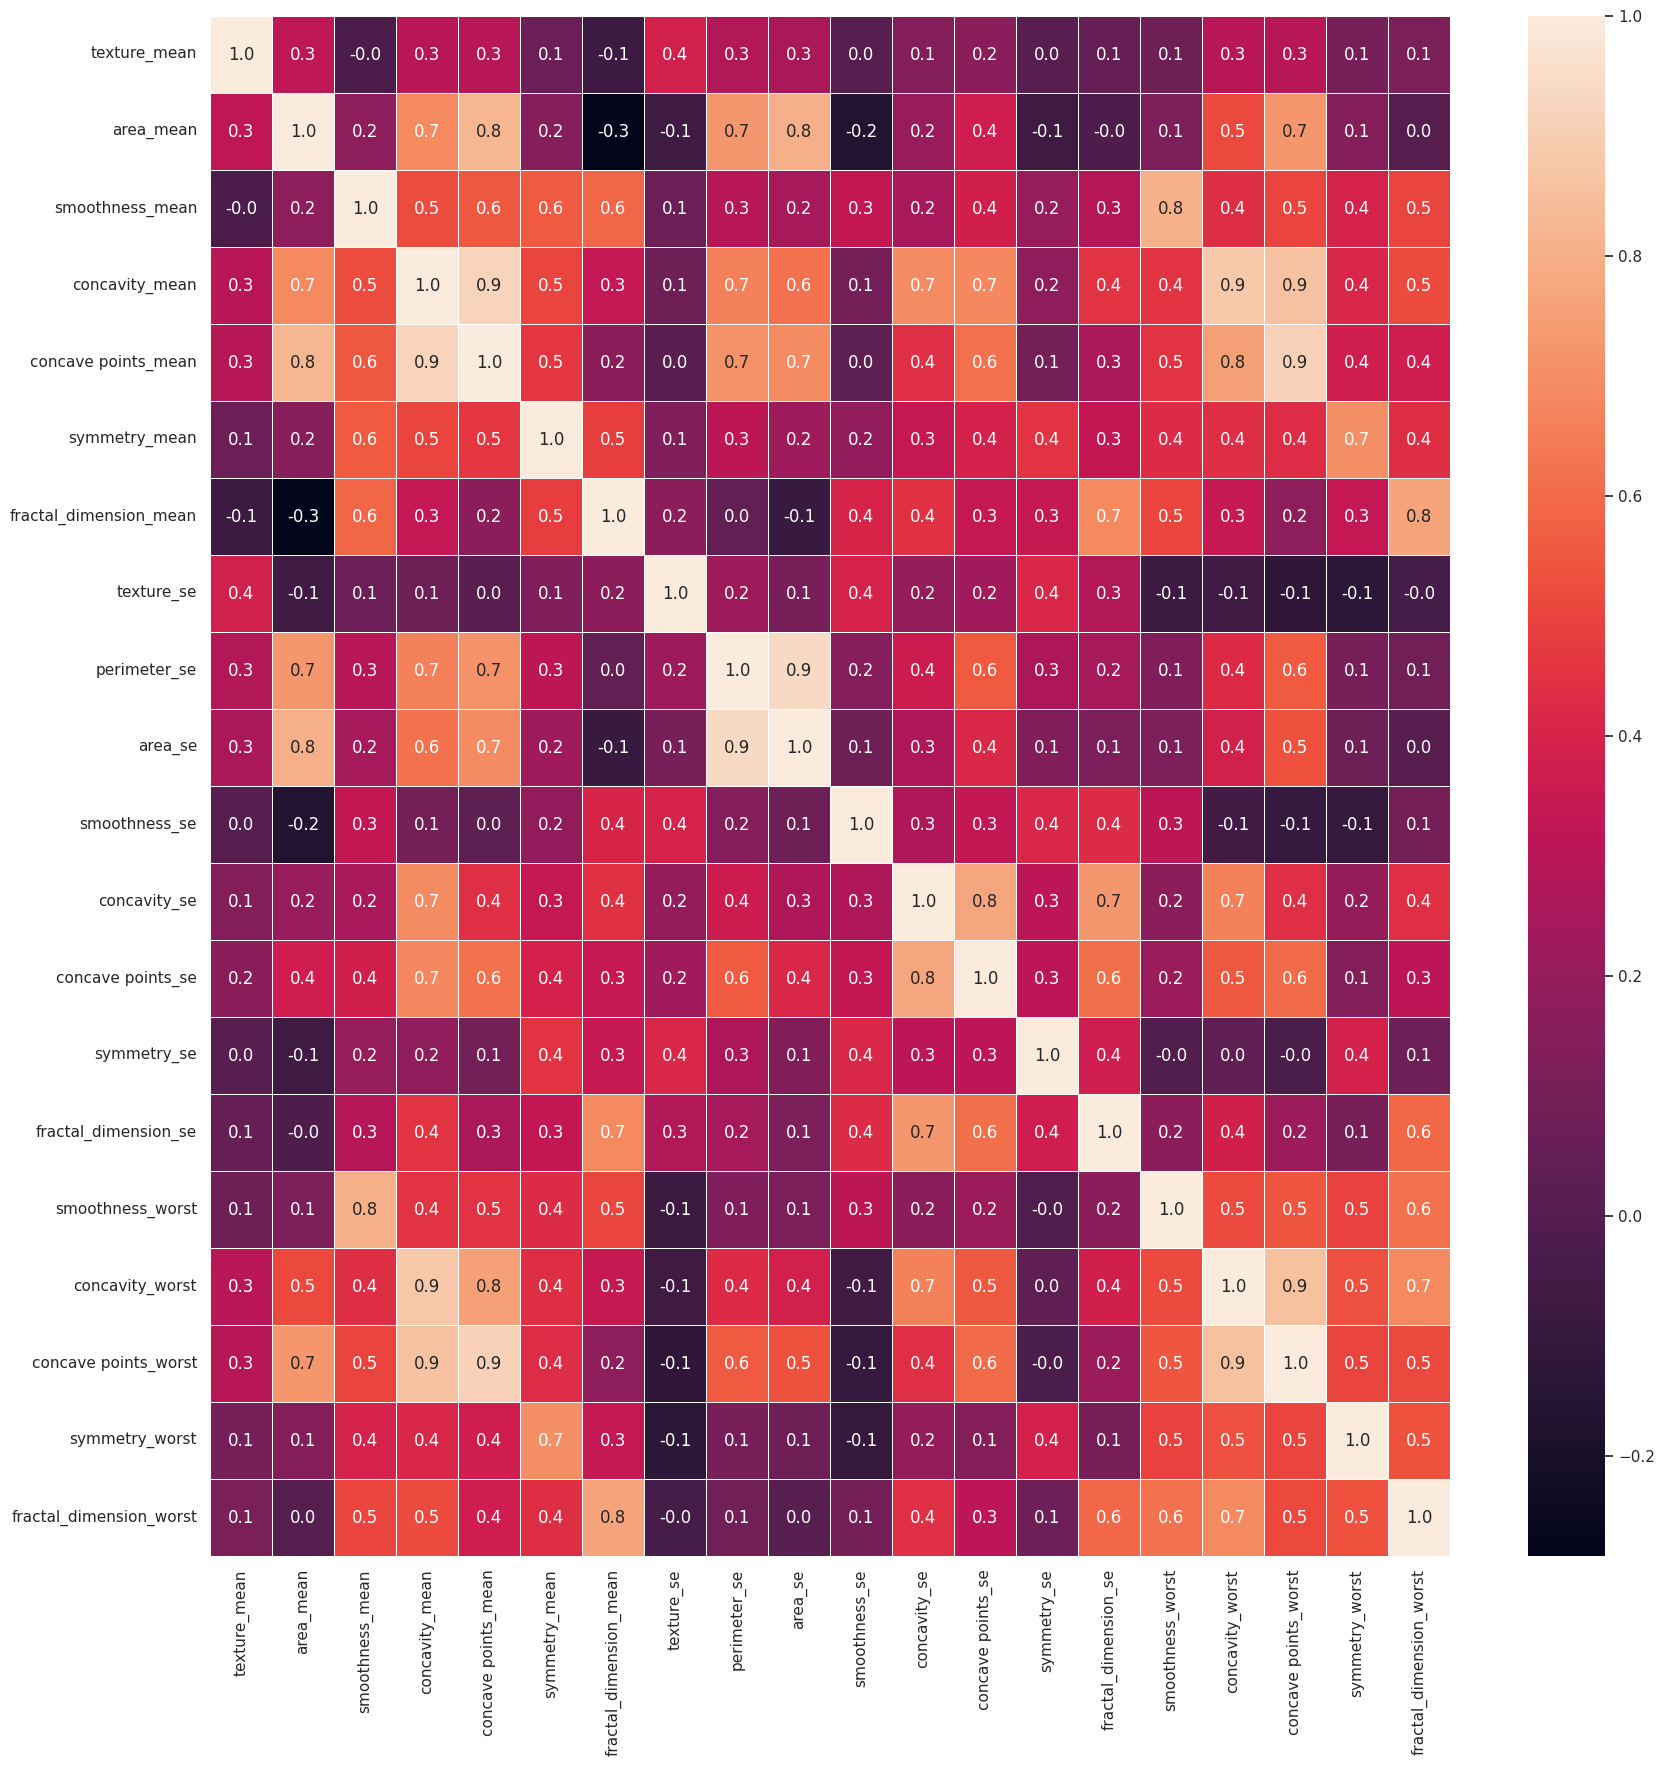

In [20]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(x1.corr(),annot=True,linewidth=0.5,fmt='.1f',ax=ax)
plt.show()

Accuracy is:  94.73684210526315


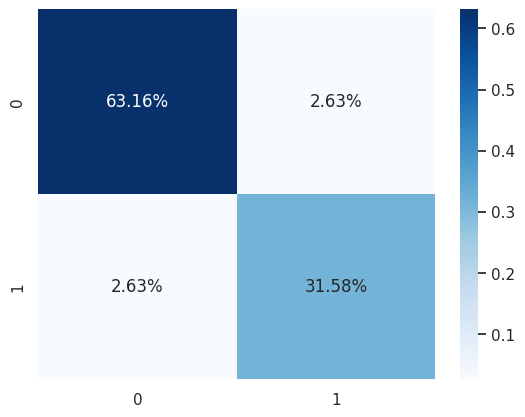

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2, random_state = 21)
clf_rf = RandomForestClassifier(random_state = 42)
clr_rf = clf_rf.fit(x_train, y_train)

ac = accuracy_score(y_test, clf_rf.predict(x_test))
print('Accuracy is: ', ac*100)

cm = confusion_matrix(y_test, clf_rf.predict(x_test))
sns.heatmap(cm/np.sum(cm), annot = True, fmt = '.2%', cmap = 'Blues')
plt.show()
